<a href="https://colab.research.google.com/github/weixinluo524/AAI2026/blob/main/coding_exercise_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Part 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) Load generated dataset (generated from ChatGPT with more than 500+record)
df = pd.read_csv("housing_price_footage_location.csv")

# 2) Rename data columns to match the code
df = df.rename(columns={"footage": "square_footage"})

# Features and target
X = df[['square_footage', 'location']]
y = df['price']
# Preprocessing: One-hot encode the location column
preprocessor = ColumnTransformer(
transformers=[
('location', OneHotEncoder(sparse_output=False), ['location'])
], remainder='passthrough')
# Create pipeline with preprocessing and model
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', LinearRegression())
])
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Train model
model.fit(X_train, y_train)
# Make prediction for a new house: 2000 sq ft in Downtown
new_house = pd.DataFrame({'square_footage': [2000], 'location': ['Downtown']})
predicted_price = model.predict(new_house)
print(f"Predicted price for a 2000 sq ft house in Downtown: ${predicted_price[0]:,.2f}")
# Display model coefficients
feature_names = (model.named_steps['preprocessor']
.named_transformers_['location']
.get_feature_names_out(['location'])).tolist() + ['square_footage']
coefficients = model.named_steps['regressor'].coef_
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Predicted price for a 2000 sq ft house in Downtown: $452,598.71

Model Coefficients:
location_Downtown: 1402.26
location_Rural: 7875.61
location_Suburb: -9277.87
square_footage: 203.11


In [10]:
#Part 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load CSV. Acquired from Kaggle. source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# Convert target to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select relevant features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'InternetService',
                        'Contract', 'PaymentMethod']

X = df[numerical_features + categorical_features]
y = df['Churn']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create and train model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Model Performance:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#The logistic regression model estimates each customer’s churn probability,
#which represents the likelihood that the customer will leave the company
#based on features such as tenure,monthly charges, contract type, and
#payment method. For example, if the model outputs a churn probability
#of 0.72 for a customer, it means there is a 72% predicted risk that this
#customer will churn. The business can use this probability as a risk score to
#proactively target high-risk customers with retention strategies such as
#personalized discounts, contract upgrades, or customer support outreach.
#By focusing on customers with higher predicted probabilities, the company
#can allocate resources more efficiently and reduce overall churn.

Model Performance:
ROC-AUC Score: 0.830

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407


Confusion Matrix:
[[921 112]
 [166 208]]


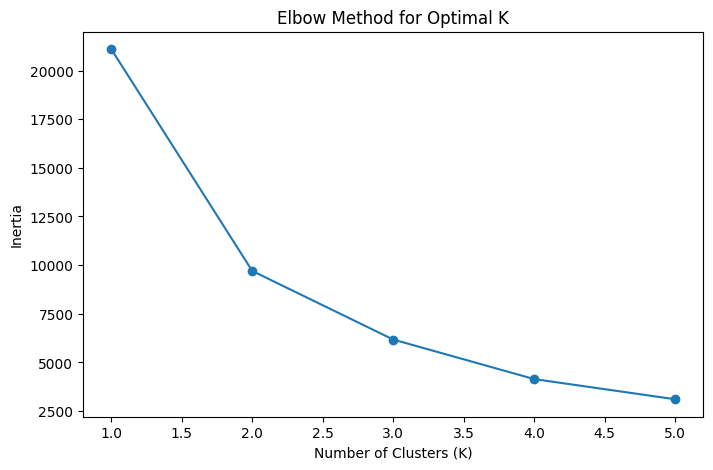

Cluster Characteristics:
         tenure  MonthlyCharges  TotalCharges
cluster                                      
0         29.62           26.63        815.26
1         58.57           89.74       5249.43
2         13.26           74.97       1031.88

Cluster 0 Strategy:
New or low-value customers: Offer onboarding incentives.

Cluster 1 Strategy:
High monthly charges customers: Offer loyalty discounts.

Cluster 2 Strategy:
High monthly charges customers: Offer loyalty discounts.


In [11]:
#Part3
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset. I used the same Dataset from Part 2
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Clean TotalCharges column (it contains blanks)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"])

# Select numerical features for clustering
features = ["tenure", "MonthlyCharges", "TotalCharges"]

X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method (K = 1 to 5)
inertia = []
K = range(1, 6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(list(K), inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.savefig("elbow_plot.png")
plt.show()

# Apply K-Means with K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

#K-Means is grouping customers based on:
#How long they’ve been with the company (tenure)
#How much they pay monthly
#Their overall lifetime value (TotalCharges)

#analyze cluster characteristics
cluster_summary = df.groupby("cluster")[features].mean().round(2)

print("Cluster Characteristics:")
print(cluster_summary)

# Example targeted strategies
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Strategy:")

    if cluster_summary.loc[cluster, "MonthlyCharges"] > 70:
        print("High monthly charges customers: Offer loyalty discounts.")
    elif cluster_summary.loc[cluster, "tenure"] > 40:
        print("Long-tenure customers: Provide VIP retention benefits.")
    else:
        print("New or low-value customers: Offer onboarding incentives.")

# Save cluster assignments
df.to_csv("customer_segments.csv", index=False)

#cluster 0 – High-Value Loyal Customers
#High tenure, High TotalCharges
#Medium to high MonthlyCharges
#Meaning: These customers have stayed a long time and generated high revenue.
#Business Strategy: Offer VIP rewards, Provide loyalty perks,Upsell premium services,Protect them from competitors

#Cluster 1 – New / Low Tenure Customers
#Low tenure; Lower TotalCharges;Mixed MonthlyCharges
#Meaning: these customers recently joined and haven’t built loyalty yet.
#Business Strategy:improve onboarding experience,Early engagement campaigns.
#These customers are high churn risk if ignored.

#Cluster 2 – High Monthly Cost Customers
#Medium tenure ; High MonthlyCharges
#Meaning: They pay a lot monthly but may not have stayed very long.
#Business Strategy: Offer contract discounts ; Bundle packages

#The K-Means clustering model groups customers into three segments based on
#tenure, monthly charges, and total charges. Each cluster represents customers
#with similar spending behavior and service duration. For example, one cluster
# may represent long-tenure, high-value customers, while another may represent
# newer or lower-spending customers. These segments help the business design
#targeted retention strategies, such as loyalty rewards for high-value customers
# or onboarding incentives for new customers, ultimately improving customer
# satisfaction and reducing churn.
